### Using ConvoKit

In [1]:
! pip3 install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for matplotlib>=3.0.0 from https://files.pythonhosted.org/packages/af/43/54b7dfd91ed33da92973dc5d50231ef7b2d0622c8ae72babbad26bc1a319/matplotlib-3.9.0-cp312-cp312-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for pandas>=0.23.4 from https://files.pythonhosted.org/packages/dd/49/de869130028fb8d90e25da3b7d8fb13e40f5afa4c4af1781583eb1ff3839/pandas-2.2.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for msgpack-numpy>=0.4.3.2 from https://files.pythonhosted.org/packages/9b/5d/f25ac7d4fb77cbd53ddc6d05d833c6bf52b12770a44fa9a447eed470ca9a/msgpack_numpy-0.4.8-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy>=2.3.5 from https://files.pythonhosted.org/packages/

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/dalyapraz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
! python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 12.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [7]:
# quick check for the package
import spacy
from spacy.lang.ru.examples import sentences 


nlp = spacy.load("ru_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple рассматривает возможность покупки стартапа из Соединённого Королевства за $1 млрд
Apple PROPN nsubj
рассматривает VERB ROOT
возможность NOUN obj
покупки NOUN nmod
стартапа NOUN nmod
из ADP case
Соединённого ADJ amod
Королевства PROPN nmod
за ADP case
$ NOUN nmod
1 NUM appos
млрд NOUN punct


In [3]:
import convokit

Matplotlib is building the font cache; this may take a moment.


In [4]:
from convokit import Corpus, download
corpus = Corpus(download('subreddit-Cornell'))
switchboard_corpus = Corpus(download('switchboard-corpus'))

No configuration file found at /Users/dalyapraz/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [5]:
corpus.print_summary_stats()

Number of Speakers: 7568
Number of Utterances: 74467
Number of Conversations: 10744


In [8]:
utt = corpus.random_utterance()

In [9]:
print(utt)

Utterance(id: '779q31', conversation_id: 779q31, reply-to: None, speaker: Speaker(id: 'bcf623', vectors: [], meta: ConvoKitMeta({})), timestamp: 1508361220, text: 'Is there anywhere nearby (collegetown, commons) where I can get a hole in my clothes sewed? About how much might they charge if the hole is very small? (Smaller than a penny)', vectors: [], meta: ConvoKitMeta({'score': 8, 'top_level_comment': None, 'retrieved_on': 1510451787, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/779q31/clothing_repair/', 'author_flair_text': 'ECE 21'}))


In [10]:
# primary data fields
print("ID:", utt.id, "\n")
print("Reply_to:", utt.reply_to, "\n")
print("Timestamp:", utt.timestamp, "\n")
print("Text:", utt.text, "\n")
print("Conversation ID:", utt.conversation_id, "\n")
print("Speaker ID:", utt.speaker.id)

ID: 779q31 

Reply_to: None 

Timestamp: 1508361220 

Text: Is there anywhere nearby (collegetown, commons) where I can get a hole in my clothes sewed? About how much might they charge if the hole is very small? (Smaller than a penny) 

Conversation ID: 779q31 

Speaker ID: bcf623


In [11]:
utt.meta

ConvoKitMeta({'score': 8, 'top_level_comment': None, 'retrieved_on': 1510451787, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/779q31/clothing_repair/', 'author_flair_text': 'ECE 21'})

In [12]:
convo = corpus.random_conversation()
print(convo)
print()
convo.meta

Conversation('id': '784k74', 'utterances': ['784k74', 'dor6cbk', 'dorjspy', 'dork79c', 'dorka8u', 'dornr36', 'dorrkro', 'dos0hom'], 'meta': ConvoKitMeta({'title': 'Joining Marching Band', 'num_comments': 7, 'domain': 'self.Cornell', 'timestamp': 1508722983, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': ''}))



ConvoKitMeta({'title': 'Joining Marching Band', 'num_comments': 7, 'domain': 'self.Cornell', 'timestamp': 1508722983, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': ''})

In [13]:
# We use Switchboard's speakers as they have more interesting metadata
speaker = switchboard_corpus.random_speaker()
print(speaker)
print()
speaker.meta

Speaker(id: '1490', vectors: [], meta: ConvoKitMeta({'sex': 'MALE', 'education': 3, 'birth_year': 1950, 'dialect_area': 'NORTH MIDLAND'}))



ConvoKitMeta({'sex': 'MALE', 'education': 3, 'birth_year': 1950, 'dialect_area': 'NORTH MIDLAND'})

In [14]:
# Here's an example of a corpus with more sophisticated labels such as speaker intentions and perceptions
deception_corpus = Corpus(download('diplomacy-corpus'))
deception_corpus.random_utterance().meta

ConvoKitMeta({'speaker_intention': 'Truth', 'receiver_perception': 'Truth', 'receiver': 'france-Game12', 'absolute_message_index': 969, 'relative_message_index': 76, 'year': '1908', 'game_score': '11', 'game_score_delta': '4', 'deception_quadrant': 'Straightforward'})

In [15]:
# Another example is Switchboard, which has utterances with a list of [text segment, tag] pairs, 
# where tag refers to the DAMSL speech act tag.
switchboard_corpus.random_utterance().meta

ConvoKitMeta({'tag': [['# What kind of, # -/', '%']]})

In [16]:
corpus = Corpus(download('reddit-corpus-small'))

In [17]:
corpus.print_summary_stats()


Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


In [18]:
from convokit import FightingWords
fw = FightingWords()

Initializing default CountVectorizer with ngram_range (1, 3)... Done.


In [19]:
fw.fit(corpus, class1_func = lambda utt: utt.meta['subreddit'] == 'Christianity',
       class2_func = lambda utt: utt.meta['subreddit'] == 'atheism')

class1_func returned 2659 valid corpus components. class2_func returned 2736 valid corpus components.
Vocab size is 5034
Comparing language...
ngram zscores computed.


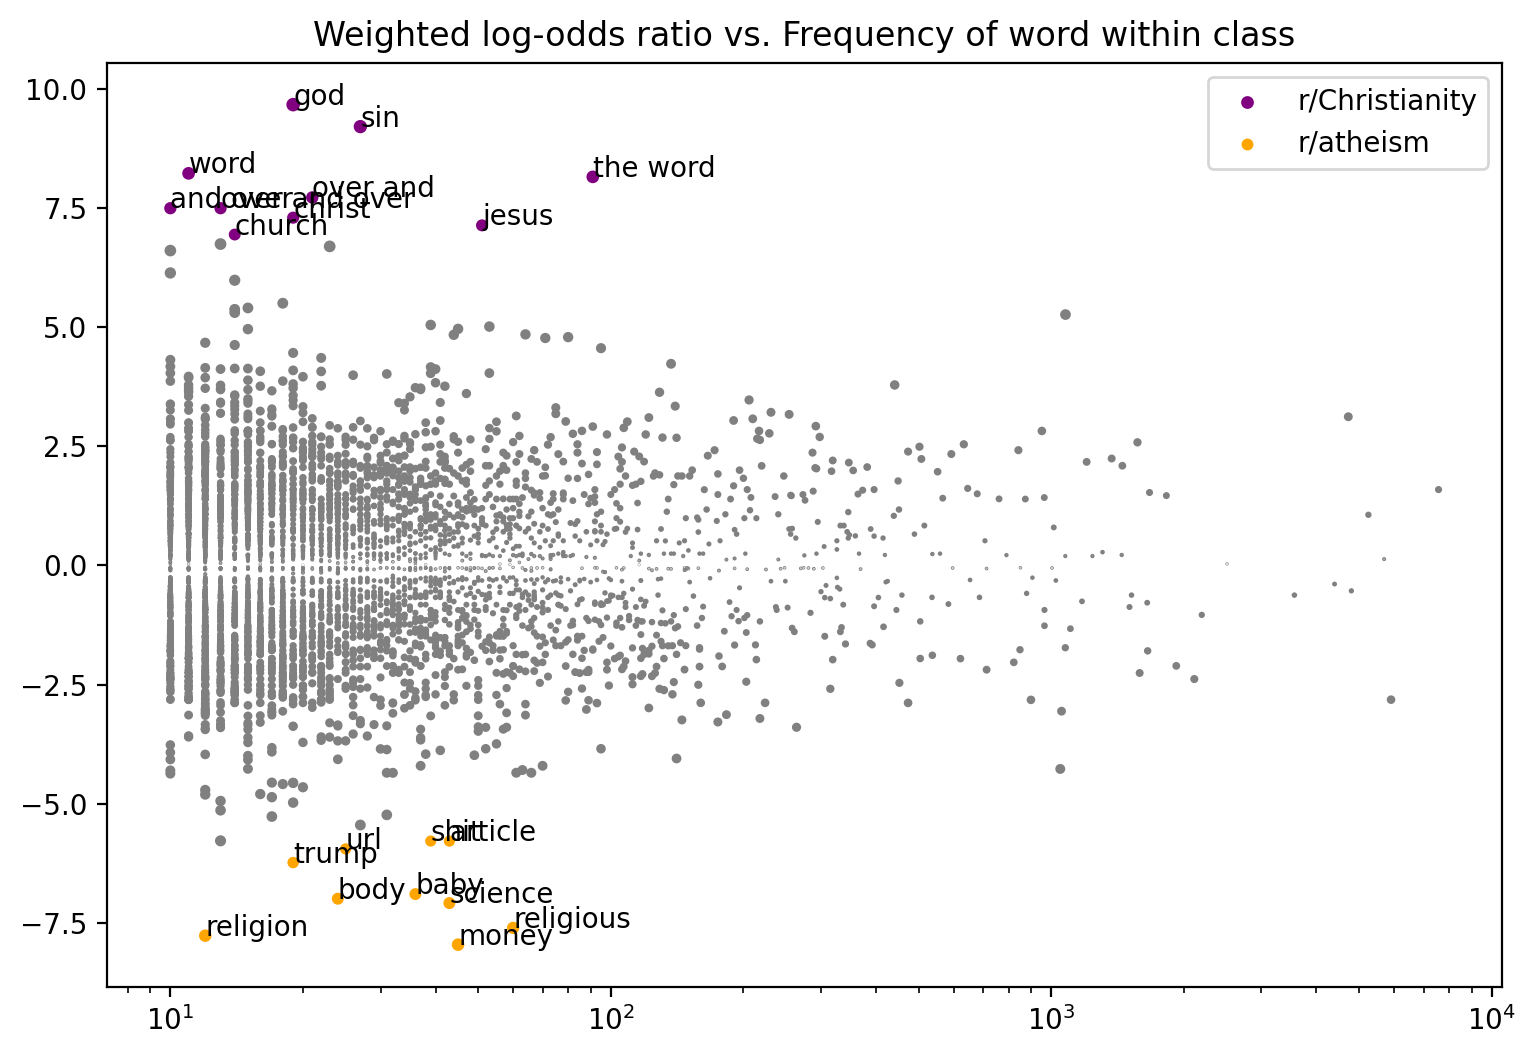

,z-score,class
ngram,,
money,-7.957425,r/atheism
religion,-7.769434,r/atheism
religious,-7.605858,r/atheism
science,-7.084885,r/atheism
body,-6.993762,r/atheism
...,...,...
over and,7.718249,r/Christianity
the word,8.149449,r/Christianity
word,8.223430,r/Christianity


In [20]:
fw.summarize(corpus, plot=True, class1_name='r/Christianity', class2_name='r/atheism')

In [15]:
import convokit
from convokit import Corpus, download
from convokit import BoWTransformer
corpus = Corpus(download('subreddit-Cornell'))
random_utt = corpus.random_utterance()
random_utt

Dataset already exists at /Users/dalyapraz/.convokit/downloads/subreddit-Cornell


Utterance({'obj_type': 'utterance', 'vectors': [], 'speaker_': Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x13b966900>, 'id': 'lnpxt', 'meta': ConvoKitMeta({})}), 'owner': <convokit.model.corpus.Corpus object at 0x13b966900>, 'id': 'dvf54ln', 'meta': ConvoKitMeta({'score': 19, 'top_level_comment': 'dvf54ln', 'retrieved_on': 1524975362, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/8344kv/travel_feasibility/dvf54ln/', 'author_flair_text': ''})})

In [16]:
# The utterance does not have any vectors associated with it
random_utt.vectors

[]

In [17]:
# The corpus does not have any vectors associated with it
corpus.vectors

set()

In [18]:
bow_transformer = BoWTransformer(obj_type="utterance", vector_name='bow')
bow_transformer.fit_transform(corpus)

Initializing default unigram CountVectorizer...Done.


In [19]:
random_utt


Utterance({'obj_type': 'utterance', 'vectors': ['bow'], 'speaker_': Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x13b966900>, 'id': 'lnpxt', 'meta': ConvoKitMeta({})}), 'owner': <convokit.model.corpus.Corpus object at 0x13b966900>, 'id': 'dvf54ln', 'meta': ConvoKitMeta({'score': 19, 'top_level_comment': 'dvf54ln', 'retrieved_on': 1524975362, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '/r/Cornell/comments/8344kv/travel_feasibility/dvf54ln/', 'author_flair_text': ''})})

In [20]:
random_utt.vectors

['bow']

In [21]:
random_utt.get_vector('bow')

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 9340)>

In [22]:
# We can get a more interpretable display of the vector as a dataframe
random_utt.get_vector('bow', as_dataframe=True)

,0,1,2,3,4,5,6,7,8,9,...,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339
dvf54ln,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
corpus.get_vector_matrix('bow')  

ConvoKitMatrix('name': bow, 'matrix': <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2108383 stored elements and shape (74467, 9340)>)

In [24]:
bow_matrix = corpus.get_vector_matrix('bow')


In [25]:
bow_matrix.to_dataframe().head()


,0,1,2,3,4,5,6,7,8,9,...,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339
nyx4d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
o0145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
o1gca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
o0ss4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
o31u0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
